# 29th March 2024

In [27]:
import warnings
from mp_api.client import MPRester
warnings.filterwarnings("ignore")

with open("api.key", "r") as keyFile:
    API_KEY = keyFile.readline().rstrip()

mpr = MPRester(API_KEY)

In [28]:
docs = mpr.summary.search(material_ids=["mp-149", "mp-13", "mp-22526"])

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
example_doc = docs[0]

mpid = example_doc.material_id
formula = example_doc.formula_pretty

In [30]:
list_of_available_fields = mpr.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

In [31]:
list_of_available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'material_id',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'bulk_modulus',
 'shear_modulus',
 'universal_anisotropy',
 'homoge

In [32]:
docs = mpr.molecules.jcesr.search(elements=['H', 'C', 'O'], nelements=(3,3), charge=(0,0))

Retrieving MoleculesDoc documents:   0%|          | 0/1813 [00:00<?, ?it/s]

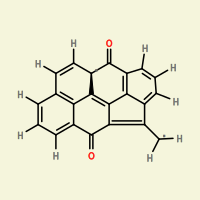

H5C11O:mol-45827


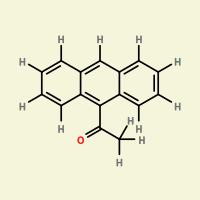

H12C16O:mol-54787


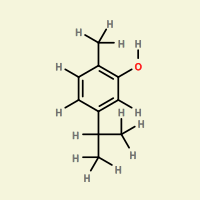

H14C10O:mol-44317


In [33]:
from IPython.display import SVG
for doc in docs[:3]:
    formula = doc.formula_pretty
    mpid = doc.task_id
    pic = doc.svg
    display(SVG(doc.svg))
    print(formula+':'+mpid)

In [34]:
doc.molecule

Molecule Summary
Site: C (0.8587, -0.3736, 0.0007)
Site: C (0.1160, 0.8173, 0.0004)
Site: C (0.1554, -1.5828, 0.0007)
Site: C (2.3820, -0.3582, 0.0002)
Site: C (-1.2794, 0.7937, -0.0000)
Site: C (-1.2436, -1.5951, 0.0003)
Site: C (2.9566, 0.3004, -1.2695)
Site: C (2.9579, 0.3020, 1.2683)
Site: C (-1.9947, -0.4174, -0.0000)
Site: O (-2.0268, 1.9500, -0.0005)
Site: C (-3.5030, -0.4194, -0.0001)
Site: H (0.6275, 1.7797, 0.0005)
Site: H (0.7021, -2.5232, 0.0010)
Site: H (2.7073, -1.4077, 0.0006)
Site: H (-1.7685, -2.5484, 0.0002)
Site: H (2.6992, 1.3660, -1.3178)
Site: H (2.5702, -0.1789, -2.1762)
Site: H (4.0512, 0.2230, -1.2816)
Site: H (2.7003, 1.3676, 1.3157)
Site: H (4.0525, 0.2249, 1.2794)
Site: H (2.5727, -0.1763, 2.1761)
Site: H (-1.4371, 2.7196, 0.0007)
Site: H (-3.9055, 0.0984, 0.8794)
Site: H (-3.8874, -1.4446, -0.0004)
Site: H (-3.9055, 0.0988, -0.8795)

In [35]:
from pymatgen.io.ase import AseAtomsAdaptor
from ase import Atoms

at = Atoms(AseAtomsAdaptor.get_atoms(doc.molecule))

In [36]:
import nglview as ngl

ngl.show_ase(at)

NGLWidget()